In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split

In [27]:
os.chdir('/Users/gopalrao000/Desktop/Bhargavi/Fall-22/ML/HW3-1') 
data=pd.read_csv("Titanic.csv")
print("dimentions",data.shape)
data.head()

dimentions (1309, 15)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
# checking column types
result = data.dtypes

print("Columns and their data type:")
print(result)

Columns and their data type:
Unnamed: 0      int64
pclass         object
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
dtype: object


In [29]:
data["survived"] = data["survived"].astype('category')

In [30]:
# checking column types
result = data.dtypes

print("Columns and their data type:")
print(result)

Columns and their data type:
Unnamed: 0       int64
pclass          object
survived      category
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
boat            object
body           float64
home.dest       object
dtype: object


In [31]:
check_null_values=data.isnull().sum(axis=0)
check_null_values



Unnamed: 0       0
pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64

In [32]:
# can use mode as well
data["age"] = data["age"].fillna(value=data["age"].mean())
data["fare"] = data["fare"].fillna(value=data["fare"].mean())
data["cabin"] = data["cabin"].fillna(value=data["cabin"].value_counts().idxmax())
data["embarked"] = data["embarked"].fillna(value=data["embarked"].value_counts().idxmax())
data["boat"] = data["boat"].fillna(value=data["boat"].value_counts().idxmax())
data["body"] = data["body"].fillna(value=data["body"].mean())
data["home.dest"] = data["home.dest"].fillna(value=data["home.dest"].value_counts().idxmax())




In [33]:
check_null_values=data.isnull().sum(axis=0)
check_null_values

Unnamed: 0    0
pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
boat          0
body          0
home.dest     0
dtype: int64

In [34]:
pd.unique(data["survived"])

[1, 0]
Categories (2, int64): [0, 1]

# Q1 Take a random 80% samples for training and the rest 20% for test.

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

# Q2Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’.¶

In [36]:
x_train=train[["pclass","sex","age","sibsp"]].values
y_train=train[["survived"]]

x_test=test[["pclass","sex","age","sibsp"]].values
y_test=test[["survived"]]



In [37]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1047, 4) (1047, 1) (262, 4) (262, 1)


In [58]:
x_train

array([[1, 0, 50.0, 0],
       [0, 0, 39.0, 0],
       [2, 1, 22.0, 0],
       ...,
       [2, 0, 4.0, 0],
       [2, 0, 21.0, 0],
       [0, 1, 35.0, 0]], dtype=object)

In [59]:
y_train

,survived
551,1
180,1
668,0
203,0
263,1
...,...
639,0
141,1
916,1
1182,1


In [38]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(['1st','2nd','3rd'])
x_train[:,0] = label_encoder.transform(x_train[:,0])

label_encoder1 = preprocessing.LabelEncoder()
label_encoder1.fit(['female', 'male'])
x_train[:,1] = label_encoder1.transform(x_train[:,1])

In [60]:
x_train

array([[1, 0, 50.0, 0],
       [0, 0, 39.0, 0],
       [2, 1, 22.0, 0],
       ...,
       [2, 0, 4.0, 0],
       [2, 0, 21.0, 0],
       [0, 1, 35.0, 0]], dtype=object)

In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(criterion="entropy",max_depth=8)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

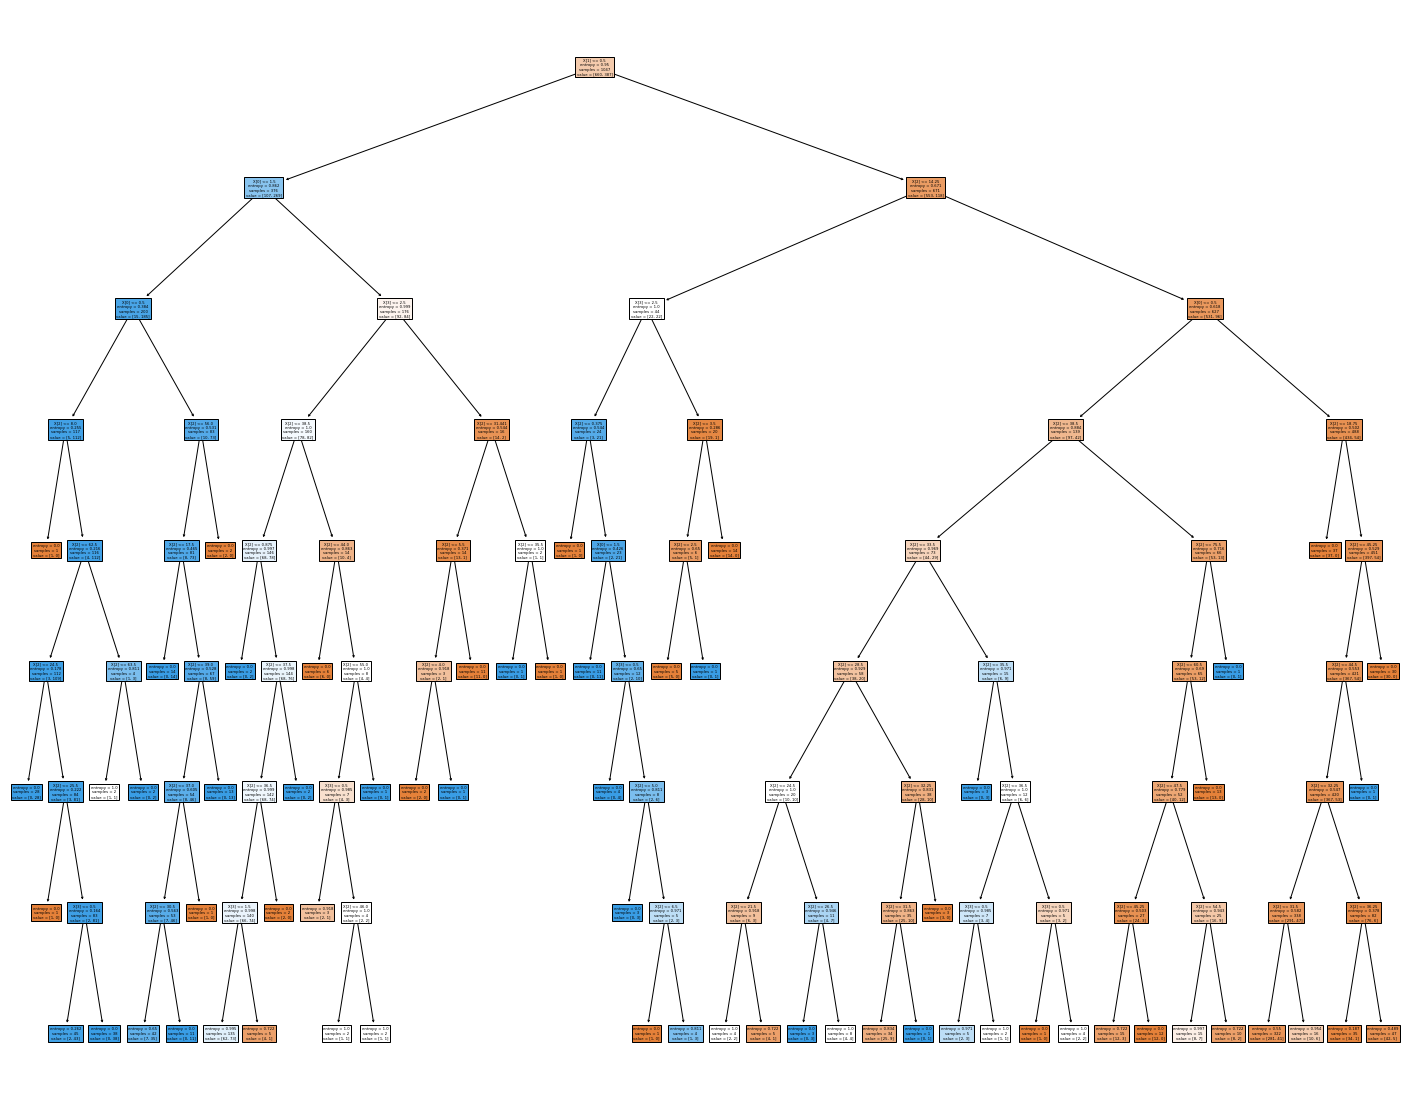

In [41]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
#img=tree.plot_tree(decision_tree, filled=True,feature_names=x_train.columns)
img=tree.plot_tree(decision_tree, filled=True)
fig.savefig("decistion_tree.png")

In [42]:
x_test = test[['pclass','sex','age','sibsp']].values
x_test[:,0] = label_encoder.transform(x_test[:,0])
x_test[:,1] =label_encoder1.transform(x_test[:,1])
y_test = test["survived"]

In [43]:
predicted =decision_tree.predict(x_test)

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy Score:")
print(metrics.accuracy_score(y_test, predicted))

print(" ")
print(" Confusion Matrix: ")
print(confusion_matrix(y_test, predicted))

print("")
print(" Classification report")
print(classification_report(y_test, predicted))

Accuracy Score:
0.7709923664122137
 
 Confusion Matrix: 
[[128  21]
 [ 39  74]]

 Classification report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       149
           1       0.78      0.65      0.71       113

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



Accuracy of the Decision tree model is: 0.77

# Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
parameters={'max_leaf_nodes':range(10,30,1)}
clf = GridSearchCV(estimator =decision_tree , param_grid = parameters, cv= 6)
clf.fit(x_train,y_train)
score=clf.cv_results_
#print(score)
print(clf.best_params_)

#clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
print("Initial score:", clf.best_score_)
print("Initial parameters: ", clf.best_params_)

{'max_leaf_nodes': 10}
Initial score: 0.798472906403941
Initial parameters:  {'max_leaf_nodes': 10}


In [46]:
decision_tree_grid = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 10)
print(decision_tree_grid.fit(x_train,y_train))

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)


[Text(471.8382352941177, 996.6, 'X[1] <= 0.5\nentropy = 0.95\nsamples = 1047\nvalue = [660, 387]'),
 Text(164.11764705882354, 815.4000000000001, 'X[0] <= 1.5\nentropy = 0.862\nsamples = 376\nvalue = [107, 269]'),
 Text(82.05882352941177, 634.2, 'entropy = 0.384\nsamples = 200\nvalue = [15, 185]'),
 Text(246.1764705882353, 634.2, 'X[3] <= 2.5\nentropy = 0.999\nsamples = 176\nvalue = [92, 84]'),
 Text(164.11764705882354, 453.0, 'entropy = 1.0\nsamples = 160\nvalue = [78, 82]'),
 Text(328.2352941176471, 453.0, 'entropy = 0.544\nsamples = 16\nvalue = [14, 2]'),
 Text(779.5588235294118, 815.4000000000001, 'X[2] <= 14.25\nentropy = 0.671\nsamples = 671\nvalue = [553, 118]'),
 Text(574.4117647058824, 634.2, 'X[3] <= 2.5\nentropy = 1.0\nsamples = 44\nvalue = [22, 22]'),
 Text(492.3529411764706, 453.0, 'entropy = 0.544\nsamples = 24\nvalue = [3, 21]'),
 Text(656.4705882352941, 453.0, 'entropy = 0.286\nsamples = 20\nvalue = [19, 1]'),
 Text(984.7058823529412, 634.2, 'X[0] <= 0.5\nentropy = 0.618

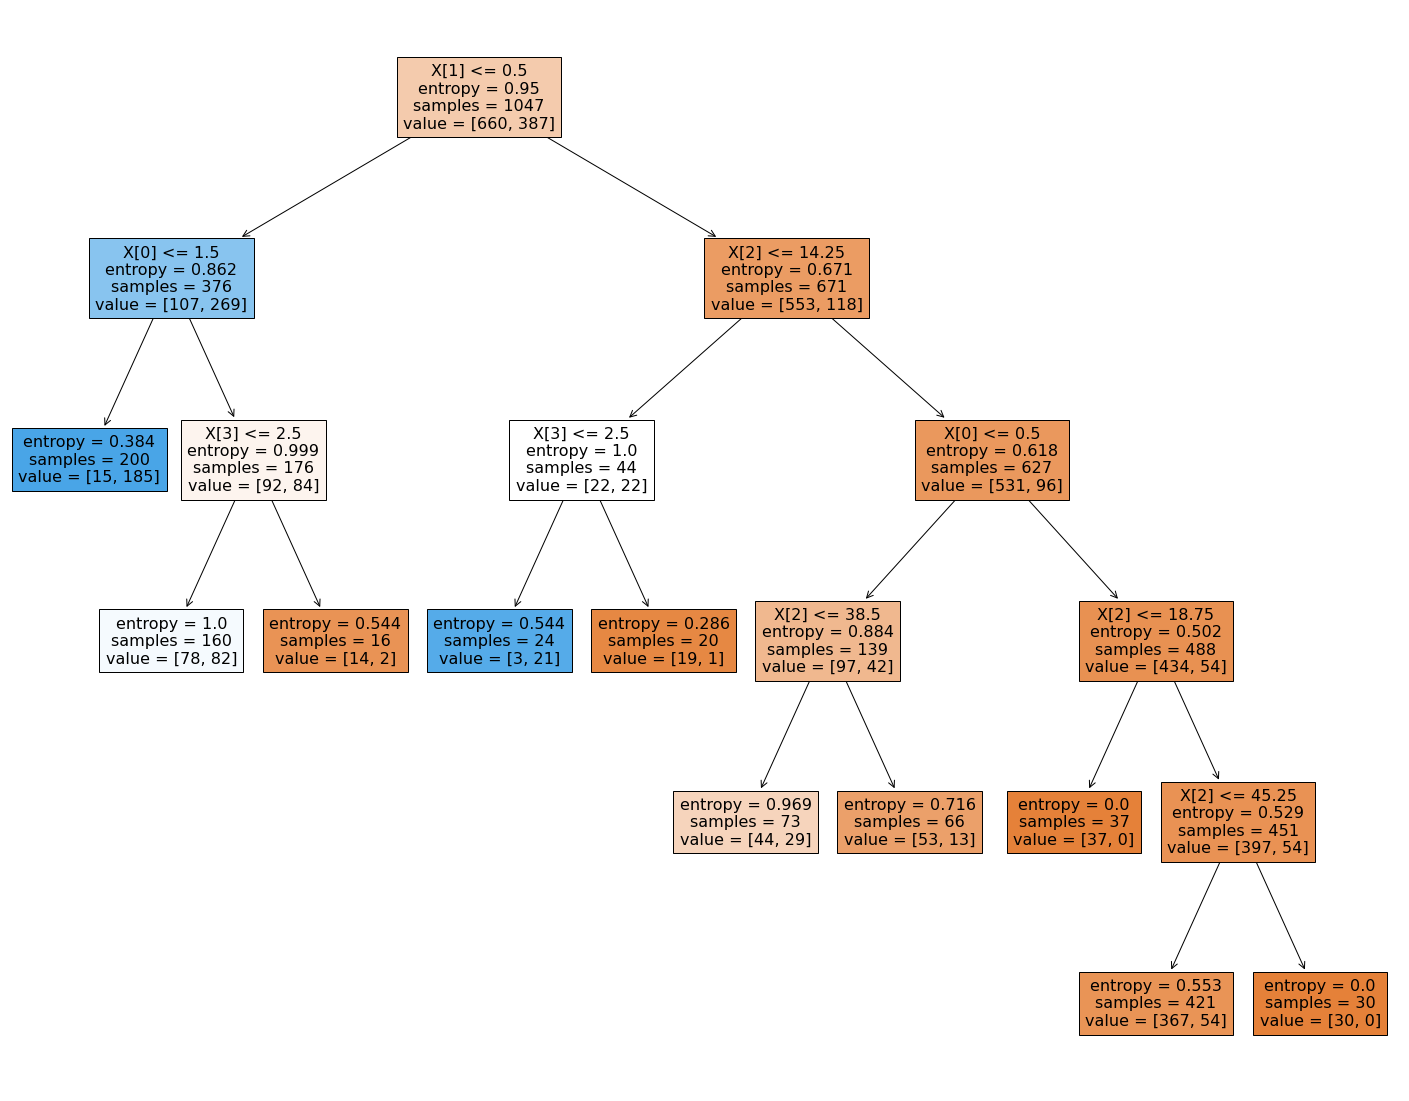

In [47]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree_grid, filled=True)

# Step 4: For the pruned tree, report its accuracy on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)


In [48]:
predicted_2 =decision_tree_grid.predict(x_test)
print("Accuracy\n")
print("Score before using Grid Serach CV")
print(metrics.accuracy_score(y_test, predicted))
print("Score using Grid Serach CV")
print(metrics.accuracy_score(y_test,predicted_2))
print("")
print(" ")
print("Confusion Matrix before using GridSearchCV: ")
print(confusion_matrix(y_test, predicted))
print("Confusion Matrix using GridSearchCV")
print(confusion_matrix(y_test,predicted_2))
print("")

print(" Classification report before using GridSerch CV")
print(classification_report(y_test, predicted))

print(" Classification report using GridSerch CV")
print(classification_report(y_test,predicted_2))




Accuracy

Score before using Grid Serach CV
0.7709923664122137
Score using Grid Serach CV
0.7824427480916031

 
Confusion Matrix before using GridSearchCV: 
[[128  21]
 [ 39  74]]
Confusion Matrix using GridSearchCV
[[129  20]
 [ 37  76]]

 Classification report before using GridSerch CV
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       149
           1       0.78      0.65      0.71       113

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262

 Classification report using GridSerch CV
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       149
           1       0.79      0.67      0.73       113

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262



 It is observed that Accuracy score was increased with using GridSearchCV from 0.77 to 0.78


percent survivors correctly predicted (on test set): 79%
percent fatalities correctly predicted (on test set): 78%

# Step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. 

# Report the accuracy of random forest on the test set for the following:  percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set) .Check whether there is improvement as compared to a single tree obtained in Step 4.

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [54]:
forest = RandomForestClassifier(n_estimators=50,max_leaf_nodes = 10)

In [55]:
# here changed the y_train to A column-vector y was passed when a 1d array was expected

forest.fit(x_train,y_train.values.ravel())  

RandomForestClassifier(max_leaf_nodes=10, n_estimators=50)

In [56]:
predicted_forest = forest.predict(x_test)

In [57]:
print(metrics.accuracy_score(y_test,predicted_forest))
print(confusion_matrix(y_test,predicted_forest))
print(classification_report(y_test,predicted_forest))

0.7900763358778626
[[135  14]
 [ 41  72]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       149
           1       0.84      0.64      0.72       113

    accuracy                           0.79       262
   macro avg       0.80      0.77      0.78       262
weighted avg       0.80      0.79      0.78       262



Accuracy of the decision tree is initially :0.77 and with GridSearchCV- max_leaf_nodes(10) Accuracy score improved to ot 0.78 and 
in Random forest classfier with the GridSearchCV- max_leaf_nodes again Accuracy increases to 0.79
    
Yes, there is improvement in RandomForest Classifier when compared to Step 4 (Pruned single tree).